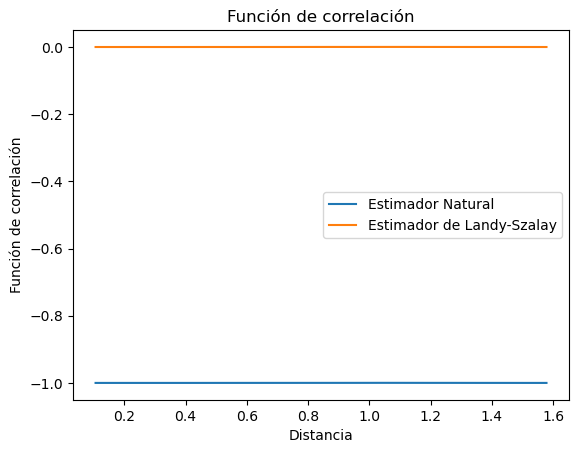

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def correlation_function(x, y, z, bins):
    # Calcular las distancias entre puntos
    r = np.sqrt(x**2 + y**2 + z**2)
    
    # Calcular la función de correlación usando el estimador natural
    counts, _ = np.histogram(r, bins=bins)
    n_pairs = len(r) * (len(r) - 1) / 2
    xi = counts / n_pairs - 1
    
    # Calcular la función de correlación usando el estimador de Landy-Szalay
    counts_rand, _ = np.histogram(np.random.uniform(size=len(r)) * np.max(r), bins=bins)
    n_pairs_rand = len(r) * len(r) / 2
    xi_ls = (counts - 2 * counts_rand) / n_pairs_rand
    
    bin_edges = np.linspace(np.min(r), np.max(r), bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    return bin_centers, xi, xi_ls

# Generar datos de ejemplo
np.random.seed(0)
N = 1000
x = np.random.rand(N)
y = np.random.rand(N)
z = np.random.rand(N)

# Calcular la función de correlación
bins = 20
r, xi, xi_ls = correlation_function(x, y, z, bins)

# Graficar la función de correlación
plt.plot(r, xi, label='Estimador Natural')
plt.plot(r, xi_ls, label='Estimador de Landy-Szalay')
plt.xlabel('Distancia')
plt.ylabel('Función de correlación')
plt.title('Función de correlación')
plt.legend()
plt.show()
